## RANDOM Forest

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../ml_datasets/BMI.csv")

In [4]:
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [6]:
x = df[['Gender', 'Height', 'Weight']]
y = df['Index']

In [7]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=1, shuffle=True)

In [8]:
xtrain

,Gender,Height,Weight
238,0,174,65
438,1,188,65
475,1,183,131
58,0,164,70
380,1,159,120
...,...,...,...
255,0,162,58
72,1,141,80
396,1,187,96
235,1,170,81


In [9]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=200)

In [10]:
len(rfc.estimators_)

200

In [11]:
ypred = rfc.predict(xtest)

In [12]:
rfc.score(xtrain, ytrain), rfc.score(xtest,ytest)

(1.0, 0.87)

<Axes: >

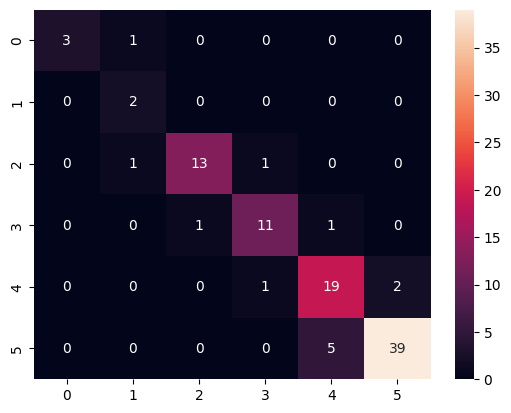

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as scs
cm = confusion_matrix(ytest, ypred)
scs.heatmap(data=cm, annot=True)

In [14]:
ans = rfc.predict(xtest)

In [15]:
res = rfc.predict([xtest.iloc[0,:]])
print("RES: ",ans[res[0]])

RES:  4


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


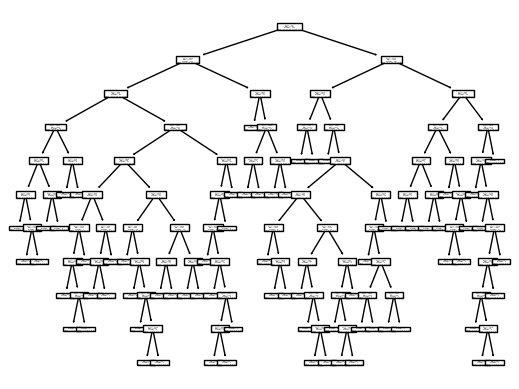

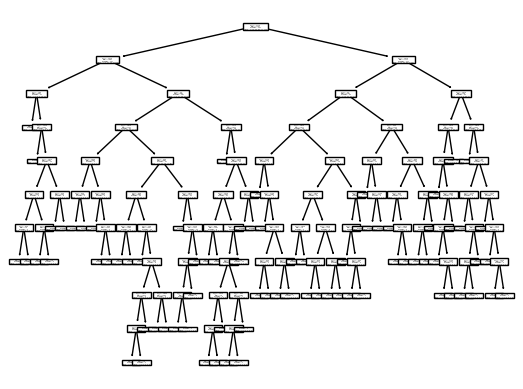

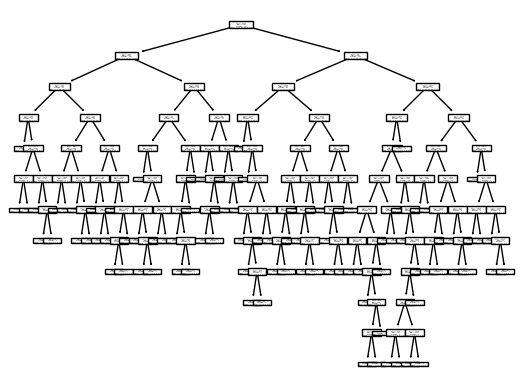

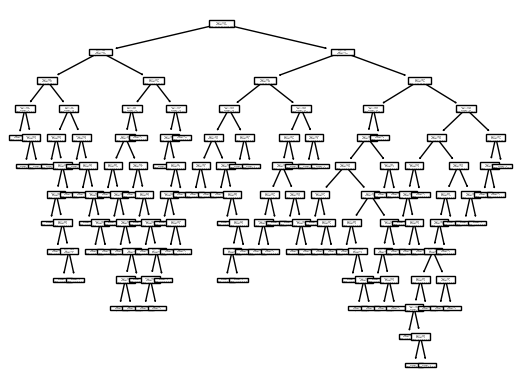

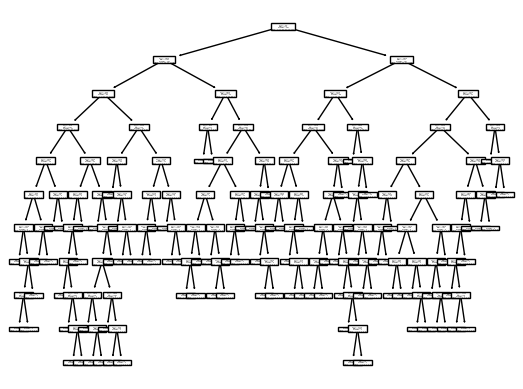

In [16]:
from sklearn.tree import plot_tree
for i in range(5):
    plot_tree(rfc.estimators_[i])
    plt.show()

In [17]:
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(RandomForestClassifier(), param_grid={1, 10, 100, 200, 300, 400, 500}, scoring="accuracy", cv=10)


In [18]:
model.fit(xtrain, ytrain)

TypeError: Parameter grid is not a dict (400)

## Bagging classifier

## Bagging classifier can choose only one algorithm

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
bg = BaggingClassifier(base_estimator=LogisticRegression())
bg.fit(xtrain, ytrain)

/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/sta

BaggingClassifier(base_estimator=LogisticRegression())

In [ ]:
bg.score(xtrain, ytrain), bg.score(xtest, ytest)

(0.745, 0.78)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
bst = AdaBoostClassifier(base_estimator=LogisticRegression(),n_estimators=100)
bst.fit(xtrain, ytrain)

/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/sta

AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=100)

In [ ]:
bst.score(xtrain, ytrain), bst.score(xtest, ytest)

(0.3775, 0.35)

## Stacking Classifier

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
sc = StackingClassifier(estimators=[('svc', SVC()),('lr', LogisticRegression())])

In [ ]:
sc.fit(xtrain, ytrain)

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

StackingClassifier(estimators=[('svc', SVC()), ('lr', LogisticRegression())])

In [ ]:
sc.score(xtrain, ytrain), sc.score(xtest, ytest)

(0.905, 0.9)